
# Caso Práctico 1: Ensamblaje de un mueble modular 🛠️

## Objetivo
Aplicar la planificación de orden parcial para representar las acciones del ensamblaje, identificar restricciones de orden y vínculos causales.

### Descripción
Una empresa de muebles desea automatizar el proceso de ensamblaje de una mesa modular. Cada parte (patas, tablero, tornillos) debe ensamblarse respetando ciertos pasos lógicos y dependencias.

### Acciones Definidas
- `Colocar patas`
- `Fijar tablero`
- `Atornillar estructura`

### Planificación de orden parcial
Representaremos:
- As: conjunto de acciones
- Os: ordenaciones parciales
- Ls: vínculos causales


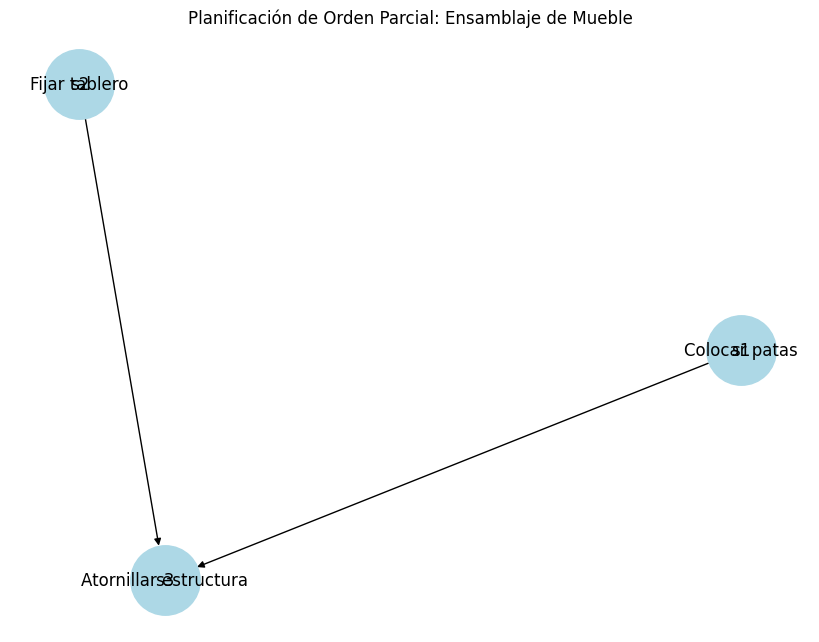

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

# Acciones (nodos del grafo)
acciones = {
    's1': 'Colocar patas',
    's2': 'Fijar tablero',
    's3': 'Atornillar estructura'
}

# Relaciones de orden (aristas dirigidas)
relaciones = [
    ('s1', 's3'),  # colocar patas antes de atornillar
    ('s2', 's3')   # fijar tablero antes de atornillar
]

# Crear el grafo dirigido
G = nx.DiGraph()
G.add_nodes_from(acciones.keys())
G.add_edges_from(relaciones)

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, arrows=True)
nx.draw_networkx_labels(G, pos, labels=acciones, font_size=12)
plt.title("Planificación de Orden Parcial: Ensamblaje de Mueble")
plt.show()



## Explicación del código

1. **Acciones**: Se definieron como un diccionario de claves (`s1`, `s2`, `s3`) con descripciones.
2. **Relaciones de orden**: Las restricciones como que `Colocar patas` y `Fijar tablero` deben ejecutarse antes de `Atornillar estructura`.
3. **Grafo dirigido**: Usamos `networkx` para representar las relaciones en forma de un diagrama dirigido que ilustra el flujo de tareas.


In [2]:

# Calcular nodos con grado de entrada cero (acciones iniciales)
acciones_iniciales = [n for n in G.nodes if G.in_degree(n) == 0]
print("Acciones iniciales (pueden ejecutarse en paralelo al inicio):")
for a in acciones_iniciales:
    print(f"- {acciones[a]}")

# Nivel de paralelismo (número máximo de acciones sin dependencia directa)
paralelismo_inicial = len(acciones_iniciales)
print(f"Nivel de paralelismo inicial: {paralelismo_inicial}")


Acciones iniciales (pueden ejecutarse en paralelo al inicio):
- Colocar patas
- Fijar tablero
Nivel de paralelismo inicial: 2



## Conclusiones

- La **planificación de orden parcial** permite representar de forma más flexible el orden entre tareas en un sistema.
- Se identificaron correctamente las acciones y dependencias para ensamblar una mesa.
- Se visualizó el plan en forma de grafo, facilitando la comprensión de la estructura del proceso.
- Se obtuvo una métrica de paralelismo que indica que dos acciones (`Colocar patas` y `Fijar tablero`) pueden ejecutarse en paralelo, optimizando el tiempo del proceso.
